###  For this project I put myself in a role of a newly hired Junior Data Analyst working for Real Estate company to help them identify features that have impact on sale prices.
- Goal of the analysis:
####  Identify the most important features of houses that affect the sale prices.

### 1. Downloading all the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()
sns.set_style("ticks")

### 2. Downloading the csv file

In [2]:
train = pd.read_csv('train.csv')

### 3. Checking general information

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- I can see that there are some columns that have a lot of missing values, therefore I will not consider them in the analysis. If a column has more than 80% of missising values, they are dropped

### 4. Deleting columns that have more than 80% missing values

In [5]:
train = train.loc[:, train.isnull().mean() < .8]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

- I Can see that there are some columns that contain information about quality. I would like to check if they are multicorrelated to other categorical parameters, which would allow me to exclude these catergorical parameters from the analysis.
- First I will convert the categorical quality parameters to numerical

### Writing function to find columns that contain certain string

In [6]:
def col_cont(df, string):
    return df.columns[df.columns.str.contains(string)]

## 5. Cleaning the Quality columns

5.1 Selecting all the Quality columns (contain 'Q')

In [7]:
qualities = col_cont(train,'Q')
train[qualities]

,OverallQual,ExterQual,BsmtQual,HeatingQC,LowQualFinSF,KitchenQual,FireplaceQu,GarageQual
0,7,Gd,Gd,Ex,0,Gd,NaN,TA
1,6,TA,Gd,Ex,0,TA,TA,TA
2,7,Gd,Gd,Ex,0,Gd,TA,TA
3,7,TA,TA,Gd,0,Gd,Gd,TA
4,8,Gd,Gd,Ex,0,Gd,TA,TA
...,...,...,...,...,...,...,...,...
1455,6,TA,Gd,Ex,0,TA,TA,TA
1456,6,TA,Gd,TA,0,TA,TA,TA
1457,7,Ex,TA,Ex,0,Gd,Gd,TA
1458,5,TA,TA,Gd,0,Gd,NaN,TA


I can see that the columns with quality estimates could be converted to continuous values as:
- Ex	Excellent assign 5
- Gd	Good assign 4
- TA	Average/Typical assign 3
- Fa	Fair assign 2
- Po	Poor assign 1
- Na    NaN assign 0

5.2 Choosing all categorical quality columns and reassigning numerical values

In [8]:
vals_to_replace = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Na':0}
col_to_replace = train[qualities].select_dtypes(include='object')
for i in col_to_replace:
    train[i] = train[i].map(vals_to_replace)

In [9]:
train[qualities]

,OverallQual,ExterQual,BsmtQual,HeatingQC,LowQualFinSF,KitchenQual,FireplaceQu,GarageQual
0,7,4,4.0,5,0,4,NaN,3.0
1,6,3,4.0,5,0,3,3.0,3.0
2,7,4,4.0,5,0,4,3.0,3.0
3,7,3,3.0,4,0,4,4.0,3.0
4,8,4,4.0,5,0,4,3.0,3.0
...,...,...,...,...,...,...,...,...
1455,6,3,4.0,5,0,3,3.0,3.0
1456,6,3,4.0,3,0,3,3.0,3.0
1457,7,5,3.0,5,0,4,4.0,3.0
1458,5,3,3.0,4,0,4,NaN,3.0


5.3 replacing missing values the FireplaceQu

In [10]:
train['FireplaceQu'] =  train['FireplaceQu'].fillna(0)
train[qualities]

,OverallQual,ExterQual,BsmtQual,HeatingQC,LowQualFinSF,KitchenQual,FireplaceQu,GarageQual
0,7,4,4.0,5,0,4,0.0,3.0
1,6,3,4.0,5,0,3,3.0,3.0
2,7,4,4.0,5,0,4,3.0,3.0
3,7,3,3.0,4,0,4,4.0,3.0
4,8,4,4.0,5,0,4,3.0,3.0
...,...,...,...,...,...,...,...,...
1455,6,3,4.0,5,0,3,3.0,3.0
1456,6,3,4.0,3,0,3,3.0,3.0
1457,7,5,3.0,5,0,4,4.0,3.0
1458,5,3,3.0,4,0,4,0.0,3.0


Upon reading the documentation I see that 

- 'OverallQual' could be related to many quality estimations
- 'HeatingQC' column coulb be related to 'Heating' column
- 'BsmtQual' could be related to other columns containing 'Bsmt'
- 'ExterQual' could be related to other columns containing 'Exter'
- 'GarageQual' coulbe be related to other columns containing 'Garage'
- 'KitchenQual' or 'FireplaceQual' seems not to be related to other values


### 6. Testing if 'HeatingQC' is related to 'Heating' type
- 'HeatingQC' column evaluates the quality of the heating system. I would like to test if the Heating system type is represented by the quality estimation. For this reason I will use target encoding with cross validation (https://maxhalford.github.io/blog/target-encoding-done-the-right-way/) 
- The plan is to calculate the mean value for each category taking into consideration the quality scale as smoothing it to the avarage of the total quality mean. So:


### Writing a function for target mean encoding with cross validation

In [11]:
train_copy = train.copy()

def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    # Compute the "smoothed" means
    smooth = round((counts * means + m * mean) / (counts + m),2)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)


6.1 Target mean encoding with cross validation for 'Heating' values

In [12]:
train_copy['Heating_Val'] = calc_smooth_mean(train_copy, by='Heating', on='HeatingQC', m=10)
train_copy['Heating_Val'].value_counts()

4.18    1428
3.52      18
3.26       7
3.60       4
3.79       2
4.04       1
Name: Heating_Val, dtype: int64

6.2 Visualizing 'Heating' types and their count

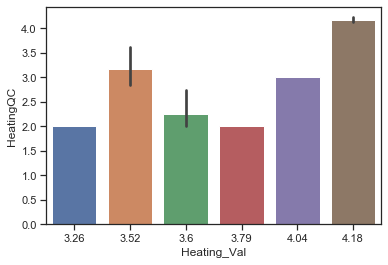

In [13]:
data=train_copy[['Heating_Val', 'HeatingQC']].sort_values('HeatingQC')
sns.barplot(data['Heating_Val'], data['HeatingQC'])

6.3 Regression analysis of 'Heating_Val' and 'HeatingQC'

In [14]:
x=train_copy["Heating_Val"]
y=train_copy["HeatingQC"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              HeatingQC   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.831e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:01:11   Log-Likelihood:                         -1984.2
No. Observations:                1460   AIC:                                      3970.
Df Residuals:                    1459   BIC:                                      3976.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Heating_Val     0.9958      0.006    168.270      0.000       0.984       1.007
==============================================================================
Omnibus:                     1443.759   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.248
Skew:                          -0.514   Prob(JB):                     1.94e-34
Kurtosis:                       1.777   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

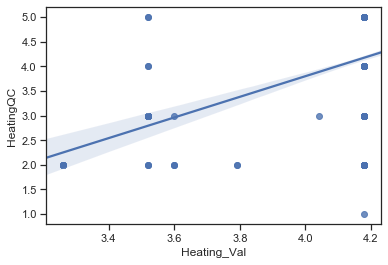

In [15]:
sns.regplot(x,y)

- Seems like the 'Heating' type is well estimated by the 'HeatingQC' , therefore it will be ommited in further analysis

6.4 Final cleaning of Heating columns

In [16]:
train_copy = train_copy.drop(columns=['Heating_Val', 'Heating'])

## 7. Cleaning columns that contain information about basment

7.1 Changing the categorical basment columns into numerical

In [17]:
bsmt = col_cont(train_copy, 'Bsmt')
train_copy[bsmt]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4.0,TA,No,GLQ,706,Unf,0,150,856,1,0
1,4.0,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,4.0,TA,Mn,GLQ,486,Unf,0,434,920,1,0
3,3.0,Gd,No,ALQ,216,Unf,0,540,756,1,0
4,4.0,TA,Av,GLQ,655,Unf,0,490,1145,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,TA,No,Unf,0,Unf,0,953,953,0,0
1456,4.0,TA,No,ALQ,790,Rec,163,589,1542,1,0
1457,3.0,Gd,No,GLQ,275,Unf,0,877,1152,0,0
1458,3.0,TA,Mn,GLQ,49,Rec,1029,0,1078,1,0


7.2 Replacing 'BsmtCond' data with continuous numerical values

In [18]:
train_copy['BsmtCond']= train_copy['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Na':0})

In [19]:
train_copy[bsmt]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4.0,3.0,No,GLQ,706,Unf,0,150,856,1,0
1,4.0,3.0,Gd,ALQ,978,Unf,0,284,1262,0,1
2,4.0,3.0,Mn,GLQ,486,Unf,0,434,920,1,0
3,3.0,4.0,No,ALQ,216,Unf,0,540,756,1,0
4,4.0,3.0,Av,GLQ,655,Unf,0,490,1145,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,3.0,No,Unf,0,Unf,0,953,953,0,0
1456,4.0,3.0,No,ALQ,790,Rec,163,589,1542,1,0
1457,3.0,4.0,No,GLQ,275,Unf,0,877,1152,0,0
1458,3.0,3.0,Mn,GLQ,49,Rec,1029,0,1078,1,0


In [20]:
train_copy['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [21]:
train_copy['BsmtExposure'] = train_copy['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
train_copy['BsmtExposure'].value_counts()

0.0    953
2.0    221
3.0    134
1.0    114
Name: BsmtExposure, dtype: int64

7.3 Visulaizing types of basment finish material types and count

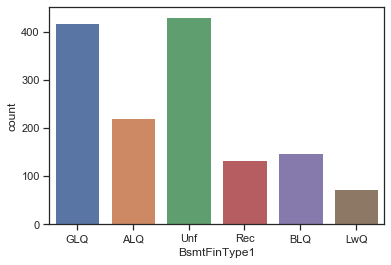

In [22]:
sns.countplot(train_copy['BsmtFinType1'])

7.4 Checking if 'BsmtFinSF1' and 'BsmtFinSF2' and 'BsmtUnfSF' since its already summed in 'TotalBsmtSF'

In [23]:
test = train_copy.loc[train_copy[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]
               .sum(axis=1) !=  train_copy['TotalBsmtSF'] ]
len(test)

0

- Indeed, the TotalBsmtSF contains the summed sized, for this reason, I will not include the BsmtFinSF1 and BsmtFinSF2 and BsmtUnfSF for further analysis

7.5 Deleting the Bsmt columns

In [24]:
train_copy = train_copy.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'])

- The 'rating' of the material type is not really continuous. The unfinished 'Unf' doesnt mean a better or worse material. Therefore they will be imputed using target encoding with cross-validation

7.6 Target encoding with cross validation fot basment finish material types 

In [25]:
for i in ['BsmtFinType1','BsmtFinType2']:
    train_copy[i] = calc_smooth_mean(train_copy, by=i, on='BsmtQual', m=10)

7.7 Calculating the mean value of different finish types

In [26]:
train_copy['BsmtType_Mean'] = train_copy[['BsmtFinType1', 'BsmtFinType2']].mean(1)

In [27]:
train_copy[['BsmtQual','BsmtType_Mean', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtType_Mean,BsmtFinType1,BsmtFinType2
0,4.0,3.840,4.07,3.61
1,4.0,3.495,3.38,3.61
2,4.0,3.840,4.07,3.61
3,3.0,3.495,3.38,3.61
4,4.0,3.840,4.07,3.61
...,...,...,...,...
1455,4.0,3.575,3.54,3.61
1456,4.0,3.315,3.38,3.25
1457,3.0,3.840,4.07,3.61
1458,3.0,3.660,4.07,3.25


7.8 Chcecking if BsmtQual column represents the mean value of different types of material

In [28]:
x=train_copy["BsmtType_Mean"].fillna(0)
y=train_copy["BsmtQual"].fillna(0)

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BsmtQual   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          5.140e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:01:12   Log-Likelihood:                         -1320.1
No. Observations:                1460   AIC:                                      2642.
Df Residuals:                    1459   BIC:                                      2647.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BsmtType_Mean     1.0010      0.004    226.725      0.000       0.992       1.010
==============================================================================
Omnibus:                       18.370   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.813
Skew:                           0.260   Prob(JB):                     8.22e-05
Kurtosis:                       3.196   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- I can see that the values are correlated, therefore I will use only the quality column for further analysis

7.9 Deleting the redundant bsmt columns

In [29]:
train_copy = train_copy.drop(columns=['BsmtType_Mean','BsmtFinType1', 'BsmtFinType2'])

7.10 summing the number of bathrooms in the basment and dropping the columns used in calculation

In [30]:
train_copy['Bsmt_BathCount'] = train_copy['BsmtFullBath'] + train_copy['BsmtHalfBath']
train_copy =train_copy.drop(columns=['BsmtFullBath','BsmtHalfBath'])

In [31]:
train_copy[col_cont(train_copy,'Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,Bsmt_BathCount
0,4.0,3.0,0.0,856,1
1,4.0,3.0,3.0,1262,1
2,4.0,3.0,1.0,920,1
3,3.0,4.0,0.0,756,1
4,4.0,3.0,2.0,1145,1
...,...,...,...,...,...
1455,4.0,3.0,0.0,953,0
1456,4.0,3.0,0.0,1542,1
1457,3.0,4.0,0.0,1152,0
1458,3.0,3.0,1.0,1078,1


###  8. Testing if 'ExterQual' is related to columns containing 'Exter'

 I would like to see if
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)

are related to 'ExterQual'. Let's play around

8.1 Getting columns that contain 'Exter', which have information about the external material

In [32]:
exter = col_cont(train_copy,'Exter')
train_copy[exter]

,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,VinylSd,VinylSd,4,TA
1,MetalSd,MetalSd,3,TA
2,VinylSd,VinylSd,4,TA
3,Wd Sdng,Wd Shng,3,TA
4,VinylSd,VinylSd,4,TA
...,...,...,...,...
1455,VinylSd,VinylSd,3,TA
1456,Plywood,Plywood,3,TA
1457,CemntBd,CmentBd,5,Gd
1458,MetalSd,MetalSd,3,TA


8.2 Target mean replacement for the 'Exterior1st' and 'Exterior2nd'

In [33]:
for i in exter[:-1]:
    train_copy[i] = calc_smooth_mean(train_copy, by=i, on='ExterQual', m=10)

In [34]:
train_copy[exter]

,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,3.71,3.72,3.99,TA
1,3.23,3.23,3.00,TA
2,3.71,3.72,3.99,TA
3,3.13,3.33,3.00,TA
4,3.71,3.72,3.99,TA
...,...,...,...,...
1455,3.71,3.72,3.00,TA
1456,3.15,3.13,3.00,TA
1457,3.79,3.80,4.74,Gd
1458,3.23,3.23,3.00,TA


8.3 Calculating the mean of the 'Exterior1st', 'Exterior2nd'

In [35]:
train_copy['Exter_Mean'] = train_copy[['Exterior1st', 'Exterior2nd']].mean(1)

8.4 Checking the correlation of calculated mean to the quality estimate

In [36]:
x=train_copy["Exter_Mean"].fillna(0)
y=train_copy["ExterQual"].fillna(0)

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ExterQual   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          7.879e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:01:12   Log-Likelihood:                         -946.15
No. Observations:                1460   AIC:                                      1894.
Df Residuals:                    1459   BIC:                                      1900.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exter_Mean     0.9961      0.004    280.691      0.000       0.989       1.003
==============================================================================
Omnibus:                       83.754   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.105
Skew:                           0.610   Prob(JB):                     8.20e-22
Kurtosis:                       3.332   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8.5 Deleting the redundant columns since they are highly correlated with the quality

In [37]:
train_copy =train_copy.drop(columns=['Exterior1st', 'Exterior2nd', 'Exter_Mean'])

### 9. Cleaning Garage columns

9.1 Checking all the garage columns

In [38]:
garage=col_cont(train_copy,'Garage')
train_copy[garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,3.0,TA
1,Attchd,1976.0,RFn,2,460,3.0,TA
2,Attchd,2001.0,RFn,2,608,3.0,TA
3,Detchd,1998.0,Unf,3,642,3.0,TA
4,Attchd,2000.0,RFn,3,836,3.0,TA
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,3.0,TA
1456,Attchd,1978.0,Unf,2,500,3.0,TA
1457,Attchd,1941.0,RFn,1,252,3.0,TA
1458,Attchd,1950.0,Unf,1,240,3.0,TA


- 'GarageType' contains information about the type of a garage. I am pretty sure it is irrelevant in estimating the price of a house, therefore I will not include it in the analysis
- 'GarageFinish' can be easily changed to numerical values
- 'GarageCond' can be easily changed to numerical values

In [39]:
col_to_delete = ['GarageType']

9.2 Reassinging values to 'GarageCond'

In [40]:
train_copy['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [41]:
train_copy['GarageCond']= train_copy['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [42]:
train_copy['GarageCond'].value_counts()

3.0    1326
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [43]:
train_copy['GarageFinish']= train_copy['GarageFinish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [44]:
train_copy[garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,2.0,2,548,3.0,3.0
1,Attchd,1976.0,2.0,2,460,3.0,3.0
2,Attchd,2001.0,2.0,2,608,3.0,3.0
3,Detchd,1998.0,1.0,3,642,3.0,3.0
4,Attchd,2000.0,2.0,3,836,3.0,3.0
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,2.0,2,460,3.0,3.0
1456,Attchd,1978.0,1.0,2,500,3.0,3.0
1457,Attchd,1941.0,2.0,1,252,3.0,3.0
1458,Attchd,1950.0,1.0,1,240,3.0,3.0


9.4 Checking if 'GarageQual' and 'GarageCond' contain redundant informaiton

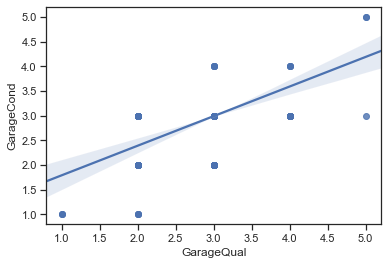

In [45]:
sns.regplot(train_copy['GarageQual'], train_copy['GarageCond'])

In [46]:
x=train_copy["GarageCond"].fillna(0)
y=train_copy["GarageQual"].fillna(0)

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             GarageQual   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.880e+05
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:01:13   Log-Likelihood:                          234.93
No. Observations:                1460   AIC:                                     -467.9
Df Residuals:                    1459   BIC:                                     -462.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GarageCond     0.9982      0.002    536.663      0.000       0.995       1.002
==============================================================================
Omnibus:                      484.389   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38438.980
Skew:                           0.605   Prob(JB):                         0.00
Kurtosis:                      28.108   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Indeed they are correlated

9.5 Marking the 'GarageCond' column to be deleted

In [47]:
col_to_delete.append('GarageCond')

9.10 Checking if 'GarageCars' and 'GarageArea' are correlated

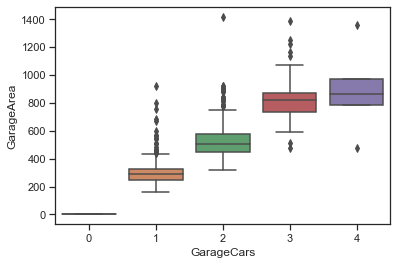

In [48]:
sns.boxplot(train_copy['GarageCars'], train_copy['GarageArea'])

- It is pretty clear that they are related.

9.11 Marking GarageCars to be deleted

In [49]:
col_to_delete.append('GarageCars')
train_copy[garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,2.0,2,548,3.0,3.0
1,Attchd,1976.0,2.0,2,460,3.0,3.0
2,Attchd,2001.0,2.0,2,608,3.0,3.0
3,Detchd,1998.0,1.0,3,642,3.0,3.0
4,Attchd,2000.0,2.0,3,836,3.0,3.0
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,2.0,2,460,3.0,3.0
1456,Attchd,1978.0,1.0,2,500,3.0,3.0
1457,Attchd,1941.0,2.0,1,252,3.0,3.0
1458,Attchd,1950.0,1.0,1,240,3.0,3.0


9.12 Deleteing the redundant columns

In [50]:
col_to_delete.append('GarageYrBlt')
col_to_delete.append('GarageFinish')
train_copy = train_copy.drop(columns=col_to_delete)

### 10. Creating new dataframe with sections that were not cleaned

In [51]:
train_copy2 = train_copy.copy()
cleaned_col = [col_cont(train_copy, i) for i in ['Bsmt', 'Heating', 'Exter', 'Bath', 'Garage', 'Q']]
for i in cleaned_col:
    train_copy2 = train_copy2[train_copy2.columns.difference(i)]

In [52]:
train_copy2.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'Fireplaces', 'Foundation', 'Functional', 'GrLivArea', 'HouseStyle',
       'Id', 'KitchenAbvGr', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'PavedDrive', 'PoolArea', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'Utilities', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

- '1stFlrSF', '2ndFlrSF' show the surface of the floors. I suspect that this the floor sizes are related to the 'GrLivArea' (Above grade (ground) living area square feet) as well as the room count 'TotRmsAbvGrd'

### 11. Cleaning the columns that contain information about the above ground surface area '1stFlrSF', '2ndFlrSF','GrLivArea','TotRmsAbvGrd','BedroomAbvGr'

In [53]:
house_size = train_copy[['1stFlrSF', '2ndFlrSF','BedroomAbvGr','TotRmsAbvGrd','GrLivArea']]
house_size = house_size.copy()
house_size['1st_2ndFlrSF'] = house_size[['1stFlrSF', '2ndFlrSF']].sum(1)

11.1 Checking correlation between the above columns by heatmap

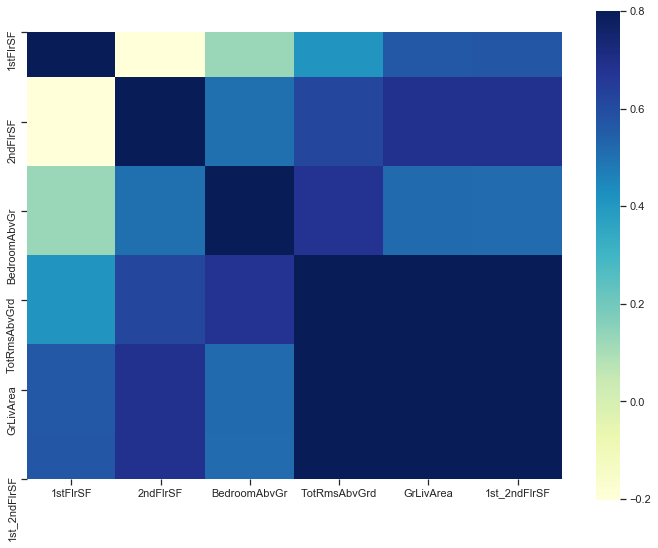

In [54]:
corrmat = house_size.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
sns.set(rc={'figure.figsize':(5,6)});

- As expeceted, these columns contain redundant information, I'll only keep GrLivArea
11.2 Deleteing the redundant columns

In [55]:
train_copy = train_copy.drop(columns=['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd','BedroomAbvGr'])

### 12. Clean up the Porch (columns :) ) (and 'WoodDeckSF since its also porch related)

In [56]:
porch = [i for i in col_cont(train_copy,'Porch')]
porch.append('WoodDeckSF')

In [57]:
train_copy[porch]

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,WoodDeckSF
0,61,0,0,0,0
1,0,0,0,0,298
2,42,0,0,0,0
3,35,272,0,0,0
4,84,0,0,0,192
...,...,...,...,...,...
1455,40,0,0,0,0
1456,0,0,0,0,349
1457,60,0,0,0,0
1458,0,112,0,0,366


12.1 Summing the surface of porch and wooddeck and deleting the corresponding columns

In [58]:
train_copy['Porch_Wooddeck_SF'] = train_copy[porch].sum(1)
train_copy=train_copy.drop(columns=porch)
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bsmt_BathCount,Porch_Wooddeck_SF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,0,2,2008,WD,Normal,208500,1,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Y,0,0,5,2007,WD,Normal,181500,1,298
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Y,0,0,9,2008,WD,Normal,223500,1,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Y,0,0,2,2006,WD,Abnorml,140000,1,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Y,0,0,12,2008,WD,Normal,250000,1,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,0,8,2007,WD,Normal,175000,0,40
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,0,2,2010,WD,Normal,210000,1,349
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,2500,5,2010,WD,Normal,266500,0,60
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,Y,0,0,4,2010,WD,Normal,142125,1,478


In [59]:
train_copy['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

### 13 Reassinging values to 'CentralAir'

In [60]:
train_copy['CentralAir'] = np.where(train_copy['CentralAir'] == 'Y', 1, 0)
train_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'PavedDrive',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'Bsmt_BathCount', 'Porch_Wooddeck_SF'],
      dtype='object')

### 14. Cleaning columnss that have data about the lot

In [61]:
lot = col_cont(train_copy, 'Lot')
train_copy[lot]

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2
...,...,...,...,...
1455,62.0,7917,Reg,Inside
1456,85.0,13175,Reg,Inside
1457,66.0,9042,Reg,Inside
1458,68.0,9717,Reg,Inside


- I assume that the SalePrice depends only on the lot size and not other values, therefore they will be dropped among with 'LandContour' which estimates the flatness of the property

14.1 Deleting the columns

In [62]:
train_copy = train_copy.drop(columns=lot).drop(columns=['LandContour', 'LandSlope'])

### 15. Cleaning remaining categorical columns

In [63]:
train_copy.select_dtypes(include='object')

,MSZoning,Street,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterCond,Foundation,Electrical,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,AllPub,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,TA,PConc,SBrkr,Typ,Y,WD,Normal
1,RL,Pave,AllPub,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,TA,CBlock,SBrkr,Typ,Y,WD,Normal
2,RL,Pave,AllPub,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,TA,PConc,SBrkr,Typ,Y,WD,Normal
3,RL,Pave,AllPub,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,BrkTil,SBrkr,Typ,Y,WD,Abnorml
4,RL,Pave,AllPub,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,TA,PConc,SBrkr,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,AllPub,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,PConc,SBrkr,Typ,Y,WD,Normal
1456,RL,Pave,AllPub,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Stone,TA,CBlock,SBrkr,Min1,Y,WD,Normal
1457,RL,Pave,AllPub,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,None,Gd,Stone,SBrkr,Typ,Y,WD,Normal
1458,RL,Pave,AllPub,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,None,TA,CBlock,FuseA,Typ,Y,WD,Normal


- There are still many categorical columns. For most of them I would need to apply Machine Learning to convert them to numerical values. Due to limited time of this project, I will ommit those categories and only convert 'Functional'

15.1 Reassigning 'Functional' values

In [64]:
train_copy['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [65]:
train_copy['Functional']= train_copy['Functional'].map({'Typ':7,
                              'Min1':6, 
                              'Min2':5, 
                              'Mod':4, 
                              'Maj1':3,
                              'Maj1':2,
                              'Sev':1,
                              'Sal':0
                             })

15.2 Deleting remaining categorical columns

In [66]:
train_copy = train_copy.drop(columns=train_copy.select_dtypes(include='object').columns)

In [67]:
train_copy.columns

Index(['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea',
       'GarageQual', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'Bsmt_BathCount', 'Porch_Wooddeck_SF'],
      dtype='object')

- 'MSSubclass' is a fake numerical column. Should be deleted due to lack of time to learn Machine Learning methods to assign true numerical values

15.3 Deleting MSSubclass and Id (fake numerical)

In [68]:
train_copy=train_copy.drop(columns=['MSSubClass', 'Id'])

15.4 Summing up number of bathrooms in the whole house

In [69]:
train_copy['Bath_Count']= train_copy[col_cont(train_copy,'Bath')].sum(1)

In [70]:
train_copy = train_copy.drop(columns =['FullBath', 'HalfBath', 'Bsmt_BathCount'])

In [71]:
col_cont(train_copy,'Bath')

Index(['Bath_Count'], dtype='object')

15.6 Deleting data about Year or Month that it was sold

In [72]:
train_copy= train_copy.drop(columns=['MoSold', 'YrSold'])
train_copy.describe()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,...,Functional,Fireplaces,FireplaceQu,GarageArea,GarageQual,PoolArea,MiscVal,SalePrice,Porch_Wooddeck_SF,Bath_Count
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1423.000000,1423.000000,1422.000000,1460.000000,...,1455.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.388849,3.579761,3.011244,0.673699,1057.429452,...,6.848797,0.613014,1.825342,472.980137,2.975344,2.758904,43.489041,180921.195890,181.329452,2.430822
std,1.382997,1.112799,30.202904,20.645407,181.066207,0.534894,0.680602,0.287846,1.047297,438.705324,...,0.671044,0.644666,1.810877,213.804841,0.248598,40.177307,496.123024,79442.502883,156.656097,0.922647
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.580000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34900.000000,0.000000,1.000000
25%,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,3.000000,3.000000,0.000000,795.750000,...,7.000000,0.000000,0.000000,334.500000,3.000000,0.000000,0.000000,129975.000000,45.000000,2.000000
50%,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,4.000000,3.000000,0.000000,991.500000,...,7.000000,1.000000,2.000000,480.000000,3.000000,0.000000,0.000000,163000.000000,164.000000,2.000000
75%,7.000000,6.000000,2000.000000,2004.000000,166.000000,3.990000,4.000000,3.000000,1.000000,1298.250000,...,7.000000,1.000000,4.000000,576.000000,3.000000,0.000000,0.000000,214000.000000,266.000000,3.000000
max,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4.740000,5.000000,4.000000,3.000000,6110.000000,...,7.000000,3.000000,5.000000,1418.000000,5.000000,738.000000,15500.000000,755000.000000,1027.000000,6.000000


### 16. Replacing missing NaN values with 0

In [73]:
train_copy=train_copy.fillna(0)

In [74]:
train_copy.describe()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,...,Functional,Fireplaces,FireplaceQu,GarageArea,GarageQual,PoolArea,MiscVal,SalePrice,Porch_Wooddeck_SF,Bath_Count
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.388849,3.489041,2.934932,0.656164,1057.429452,...,6.825342,0.613014,1.825342,472.980137,2.810274,2.758904,43.489041,180921.195890,181.329452,2.430822
std,1.382997,1.112799,30.202904,20.645407,180.731373,0.534894,0.876478,0.552159,1.039123,438.705324,...,0.780354,0.644666,1.810877,213.804841,0.722898,40.177307,496.123024,79442.502883,156.656097,0.922647
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.580000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,1.000000
25%,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,3.000000,3.000000,0.000000,795.750000,...,7.000000,0.000000,0.000000,334.500000,3.000000,0.000000,0.000000,129975.000000,45.000000,2.000000
50%,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,4.000000,3.000000,0.000000,991.500000,...,7.000000,1.000000,2.000000,480.000000,3.000000,0.000000,0.000000,163000.000000,164.000000,2.000000
75%,7.000000,6.000000,2000.000000,2004.000000,164.250000,3.990000,4.000000,3.000000,1.000000,1298.250000,...,7.000000,1.000000,4.000000,576.000000,3.000000,0.000000,0.000000,214000.000000,266.000000,3.000000
max,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4.740000,5.000000,4.000000,3.000000,6110.000000,...,7.000000,3.000000,5.000000,1418.000000,5.000000,738.000000,15500.000000,755000.000000,1027.000000,6.000000


## 17. Analysing the dependent variable SalePrice

In [75]:
train_copy['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

17.1 Checking the distribution of SalePrice

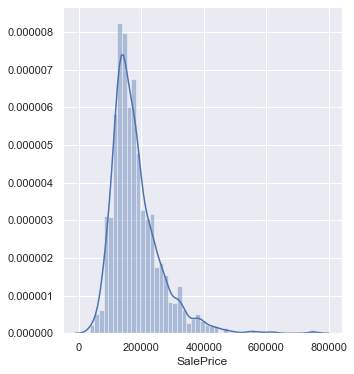

In [76]:
sns.distplot(train_copy['SalePrice'])
sns.set(rc={'figure.figsize':(5,6)});

-The distibution with quite a sharp peak and skeweness to the right, it's important to have a distribution as close to the normal distribution, therefore log transformation is in order
source: https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29

17.2 Log transformation of the dependent variable

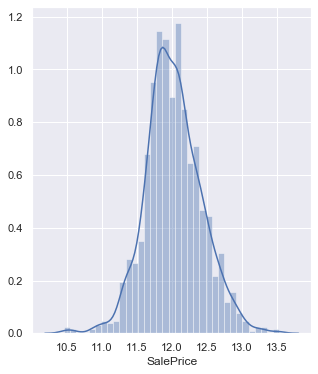

In [77]:
train_copy['SalePrice'] = np.log(train_copy['SalePrice'])
sns.distplot(train_copy['SalePrice'])
sns.set(rc={'figure.figsize':(5,6)});

17.2 Heatmap to visualize the correlation of our variables

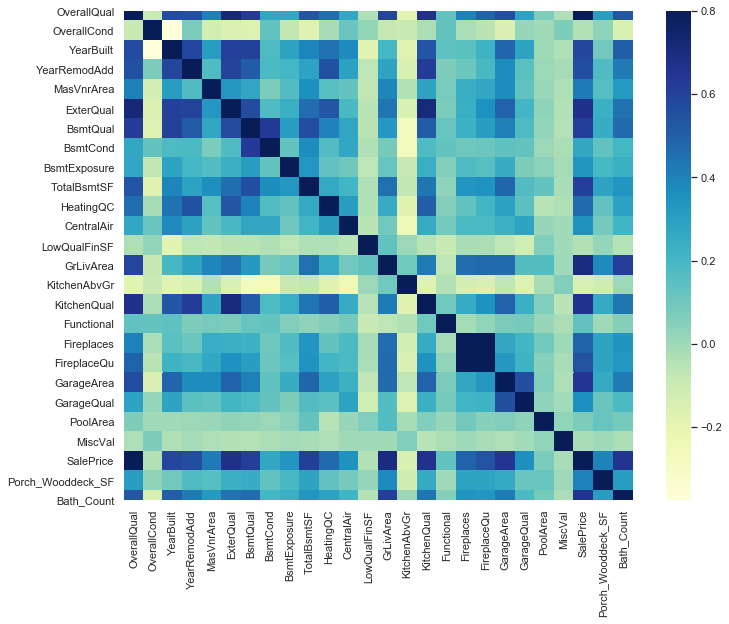

In [78]:
#correlation matrix
corrmat = train_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
sns.set(rc={'figure.figsize':(16,12)});

- The heatmap shows that some paramters highly correlate with eachother, for this reason they shell be excluded from the analysis to avoid the problem of multicolinearity.
##### Multicorrelated columns:
- 'YearsBuild', 'YearsRemodAdd', 'ExterQual', 'BsmtQual' - chose 'YearsRemodAdd'
- 'Fireplaces' and 'FireplaceQu' - chose 'FrieplaceQu'
- 'GarageArea' and 'GarageQual' - chose 'GarageQual'
- 'KitchenQual' and 'OverallQual' - chose 'OverallQual'
- 'GrvLivArea' and 'Bath_Count' - chose 'GrvLivArea'


In [79]:
train_copy = train_copy.drop(columns=['YearBuilt', 'ExterQual', 'BsmtQual','Fireplaces','GarageArea','KitchenQual','Bath_Count'])

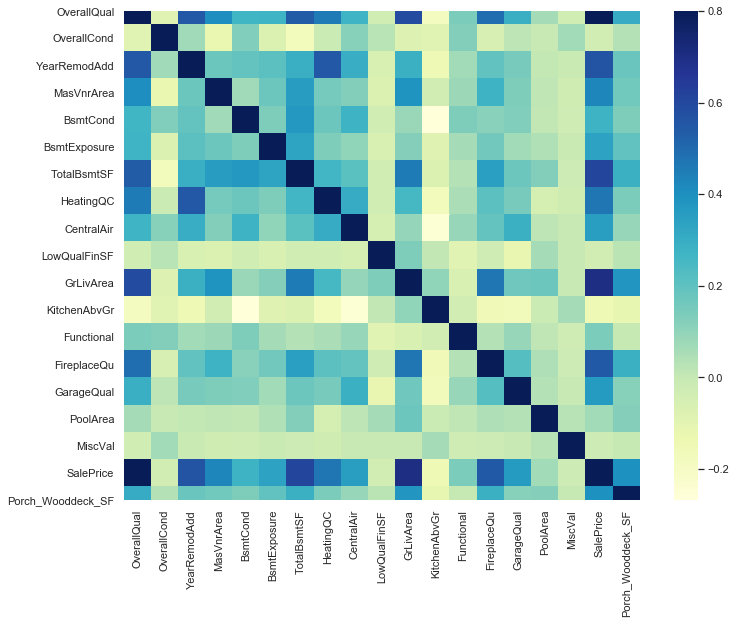

In [80]:
corrmat = train_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
sns.set(rc={'figure.figsize':(16,12)});

- Looks a bit better, I will check the Variance Inflation Factor to measure multicolinearity and discard columns that have VIF above 2.5

source: https://www.investopedia.com/terms/v/variance-inflation-factor.asp

17.3 Variance Inflation Factor measurment to detect multicolinearity

In [81]:
independent_var = train_copy.loc[:, train_copy.columns != 'SalePrice']
dependent_var = train_copy.loc[:, train_copy.columns == 'SalePrice']
X = add_constant(independent_var)
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])],
          index=X.columns)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                15678.432928
OverallQual              2.864846
OverallCond              1.159778
YearRemodAdd             1.814253
MasVnrArea               1.325167
BsmtCond                 1.363266
BsmtExposure             1.184232
TotalBsmtSF              1.866962
HeatingQC                1.570453
CentralAir               1.311553
LowQualFinSF             1.081102
GrLivArea                2.278523
KitchenAbvGr             1.276117
Functional               1.098915
FireplaceQu              1.504798
GarageQual               1.187802
PoolArea                 1.065743
MiscVal                  1.012474
Porch_Wooddeck_SF        1.262372
dtype: float64

17.3.1 Deleting 'OveralQual' since its multicorrelated to other columns

In [82]:
train_copy=train_copy.drop(columns='OverallQual')

In [83]:
train_copy

,OverallCond,YearRemodAdd,MasVnrArea,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,KitchenAbvGr,Functional,FireplaceQu,GarageQual,PoolArea,MiscVal,SalePrice,Porch_Wooddeck_SF
0,5,2003,196.0,3.0,0.0,856,5,1,0,1710,1,7.0,0.0,3.0,0,0,12.247694,61
1,8,1976,0.0,3.0,3.0,1262,5,1,0,1262,1,7.0,3.0,3.0,0,0,12.109011,298
2,5,2002,162.0,3.0,1.0,920,5,1,0,1786,1,7.0,3.0,3.0,0,0,12.317167,42
3,5,1970,0.0,4.0,0.0,756,4,1,0,1717,1,7.0,4.0,3.0,0,0,11.849398,307
4,5,2000,350.0,3.0,2.0,1145,5,1,0,2198,1,7.0,3.0,3.0,0,0,12.429216,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,2000,0.0,3.0,0.0,953,5,1,0,1647,1,7.0,3.0,3.0,0,0,12.072541,40
1456,6,1988,119.0,3.0,0.0,1542,3,1,0,2073,1,6.0,3.0,3.0,0,0,12.254863,349
1457,9,2006,0.0,4.0,0.0,1152,5,1,0,2340,1,7.0,4.0,3.0,0,2500,12.493130,60
1458,6,1996,0.0,3.0,1.0,1078,4,1,0,1078,1,7.0,0.0,3.0,0,0,11.864462,478


### 18. Visualizing the relationship between the dependent and independent variables

In [84]:
len(train_copy.columns)/3.0

6.0

18.1 Creating function to plot subplot scatterplots

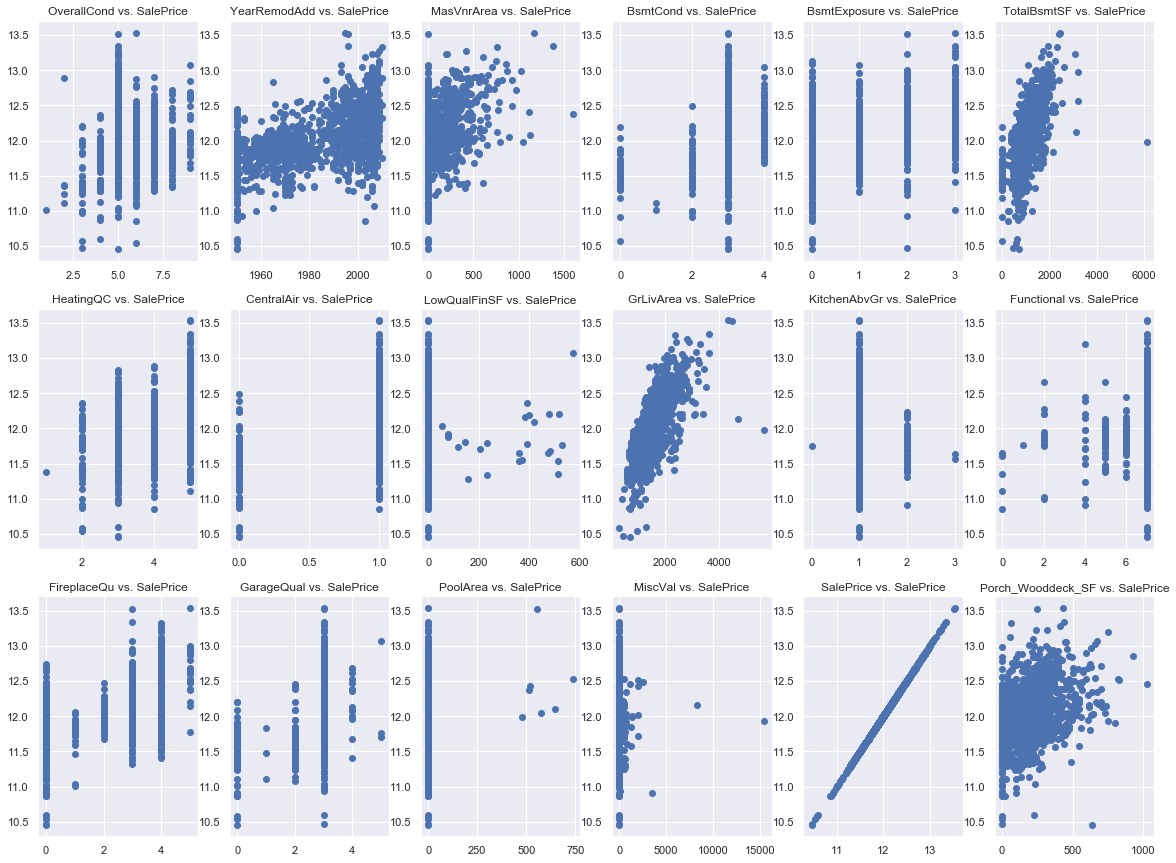

In [85]:
def plot_df_scatter_columns(df):
    fig, axes = plt.subplots(3,6, figsize = (20, 15))
    # initialize col and row
    col=0
    row=0
    # loop over df.iloc[:, :-1] instead of df
    for colname in df.iloc[:,]:
        axes[col, row].scatter(df[colname], df['SalePrice'])
        axes[col, row].set_title(colname + ' vs. SalePrice')
        # calculate i and j on the fly during loop over df
        row += 1
        if row > 5:
            row=0
            col += 1
    plt.show()

plot_df_scatter_columns(train_copy)

- 'LowQualFinSF', 'PoolArea', 'MiscVal' are overrepresented by missing values, I will convert them to boolian categories
### 19. Converting to 'LowQualFinSF', 'PoolArea', 'MiscVal' boolean values

In [86]:
to_bool = ['LowQualFinSF', 'PoolArea', 'MiscVal']
for i in to_bool:
    train_copy[i] = np.where(train_copy[i] == 0, 0,1)

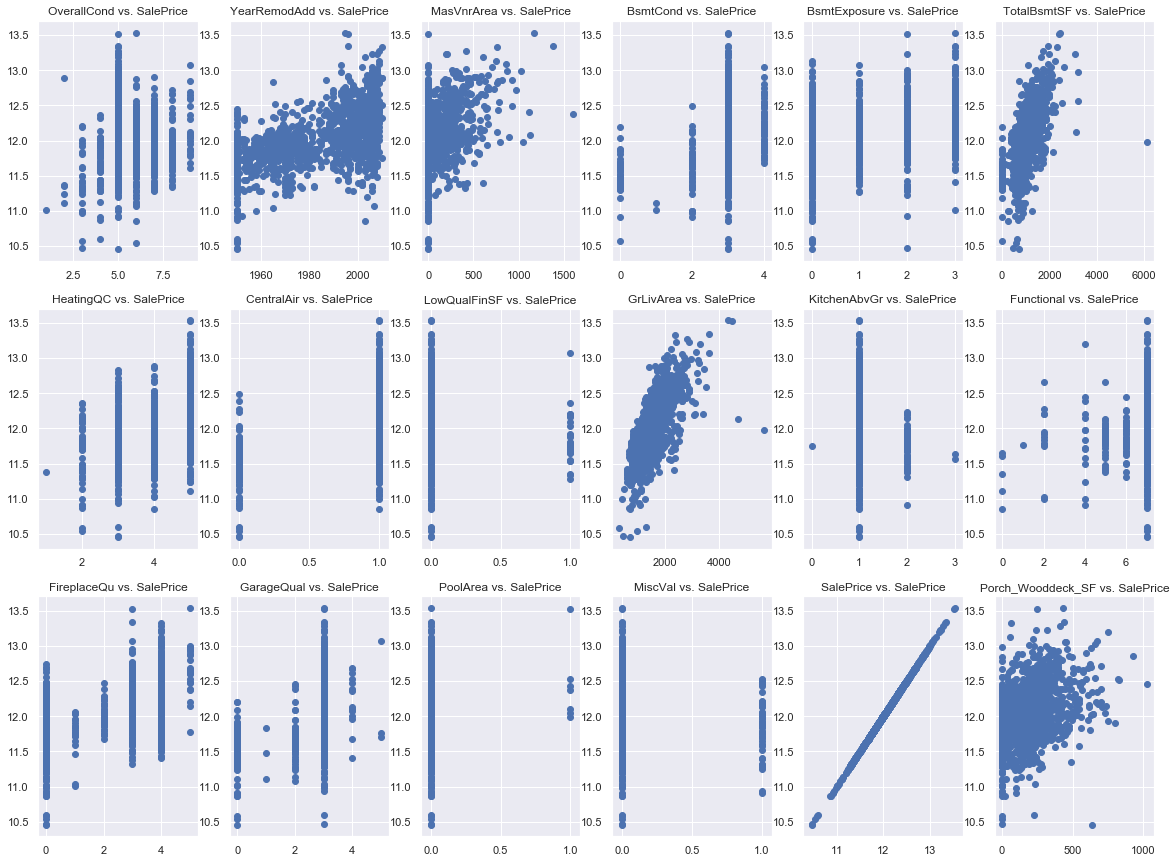

In [87]:
plot_df_scatter_columns(train_copy)

### 20. Remove the outliers from 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF'

In [89]:
with_outliers= train_copy[['YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', 'Porch_Wooddeck_SF']]

In [90]:
for i in with_outliers:
    train_copy[i]= train_copy[i][(np.abs(stats.zscore(train_copy[i]) < 3))]

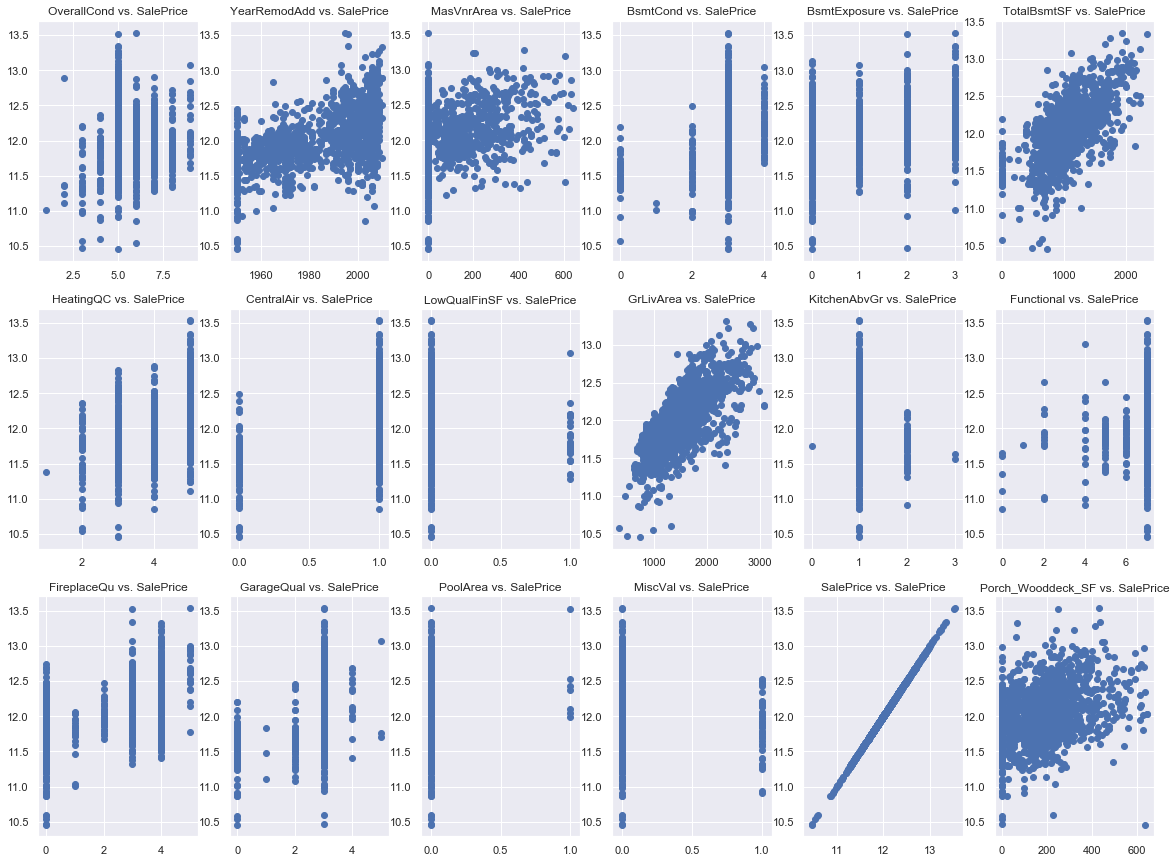

In [91]:
plot_df_scatter_columns(train_copy)

- 'MasVnrArea', 'TotalBsmtSF' have a lot of null values. I will interpolate the missing values using the mean 
### 21 Interpolating null values with mean value for chosen columns

In [92]:
to_interpolate = ['MasVnrArea', 'TotalBsmtSF']

for i in to_interpolate:
    train_copy[i]= np.where(train_copy[i] ==0, train_copy[i].mean(), train_copy[i])


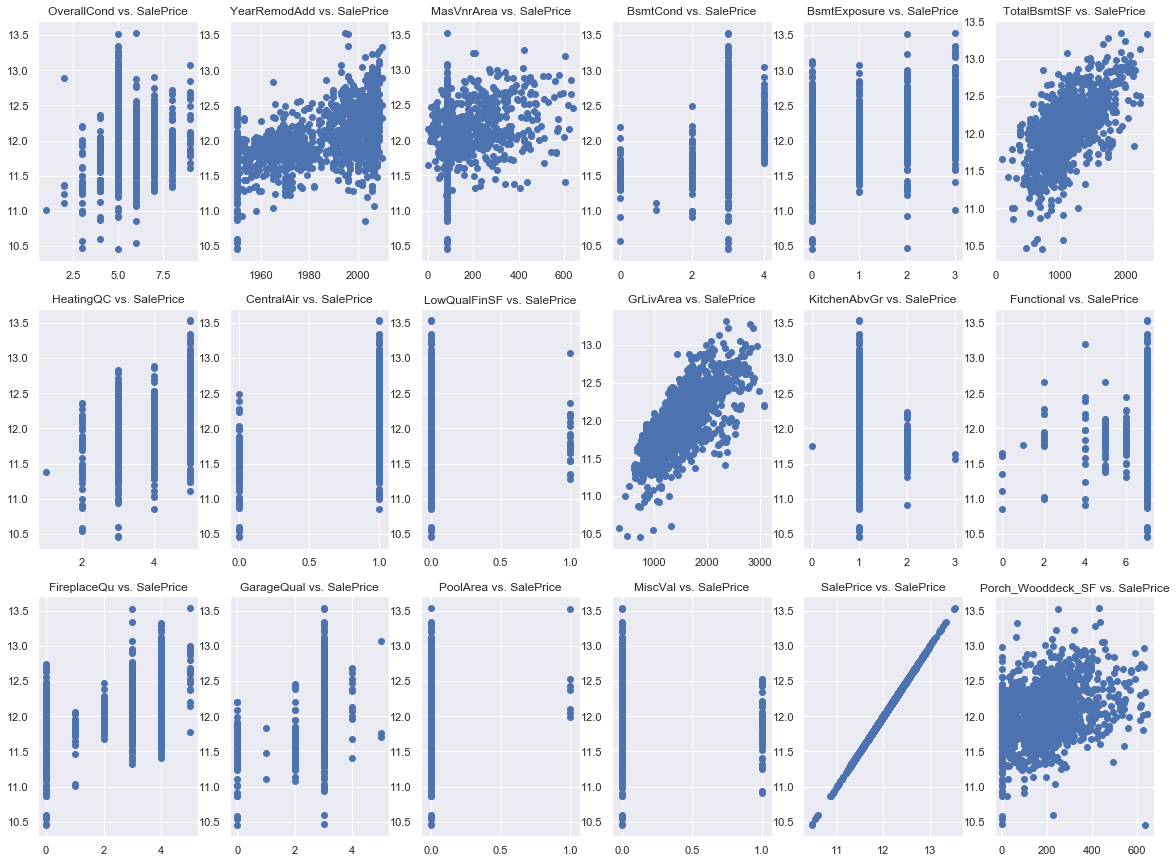

In [93]:
plot_df_scatter_columns(train_copy)

## 22. Building a regression model

In [94]:
x = train_copy.drop(columns='SalePrice')
y = train_copy['SalePrice']

22.1 Create test train subset

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

22.2 Quantifying the strength of the model

In [96]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
r_squared= model.score(X_test, y_test)

22.3 Quantifying the mean_squared_error

In [98]:
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions)

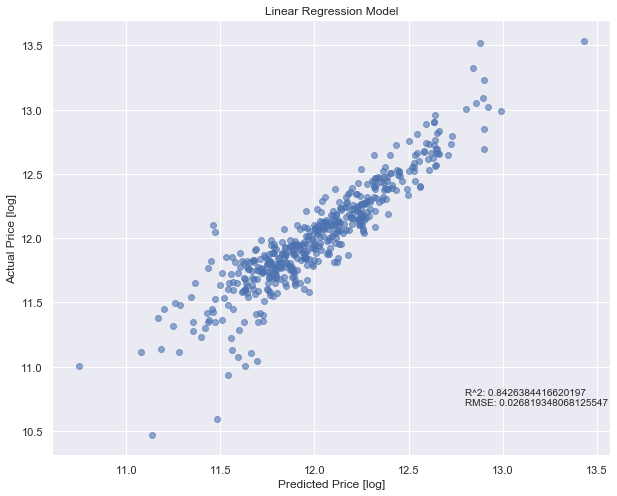

In [130]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.6,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price [log]')
plt.ylabel('Actual Price [log]')
plt.title('Linear Regression Model')
overlay = 'R^2: {}\nRMSE: {}'.format(r_squared,rmse)
plt.annotate(s=overlay,xy=(12.8,10.7),size='small')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()